# Python for Finance 2020

MSc in Finance, Universidade Católica Portuguesa

Instructor: João Brogueira de Sousa [jbsousa@ucp.pt]

## Assignment #2

This notebooks contains exercises that cover the material on notebooks 1 to 5. 

You should add your answers below, and the identification of all the group members here:

- Group member 1 name, Student ID number, email address
- Group member 2 name, Student ID number, email address
- Group member 3 name, Student ID number, email address

You may add extra cells for your answers when needed.

Note on grading: often, there will be different ways to solve the exercises and arrive at the correct result. Additional points are awarded for a **clear** and **efficient** use of Python. Follow the [style guide for Python](https://www.python.org/dev/peps/pep-0008/) to improve readability of your code. For efficiency points, as an example, a correct solution using only one `for` loop will be awarded more points than a correct solution using two or more `for` loops. 

Should you have any questions about this assignment, please write an email to [jbsousa@ucp.pt].

You should submit the solution by sending the notebook by email until Monday March 2nd 23:59 (GMT).

### Exercise 1

In what follows, assume that a year consist of 252 days.

**1.1.** Using a pandas DataFrame, import the stock market data in the file `VOO.csv`, available at the course's [GitHub repo](https://github.com/jbrogueira/pyfin2020). Plot all the time series of the price level data, labelling each line in the figure, as well as the horizontal and vertical axis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sps  # https://docs.scipy.org/doc/scipy/reference/stats.html
import statsmodels.api as stm  # https://www.statsmodels.org/stable/api.html
import seaborn as sns  # https://seaborn.pydata.org/
sns.set()

In [3]:
# Import data on Vanguard's ETFs VOO, VT, Apple and Microsoft:
data = pd.read_csv("VOO.csv")

data.set_index('Date', inplace=True) # Set the Index

data.index = pd.to_datetime(data.index, format="%d/%m/%Y") # sets index with dtype=datetime

data

,VOO,VT,AAPL,MSFT
Date,,,,
2010-09-09,83.534241,34.026402,32.622215,19.121811
2010-09-10,83.913506,34.169239,32.664379,18.994387
2010-09-13,84.968819,34.700897,33.114513,19.997868
2010-09-14,84.952339,34.804054,33.240990,19.934149
2010-09-15,85.166672,34.835804,33.508862,20.005825
...,...,...,...,...
2020-02-14,310.279999,82.930000,324.950012,184.845123
2020-02-18,309.429993,82.570000,319.000000,186.720001
2020-02-19,310.920013,83.010002,323.619995,187.279999


Text(0, 0.5, 'Price Level')

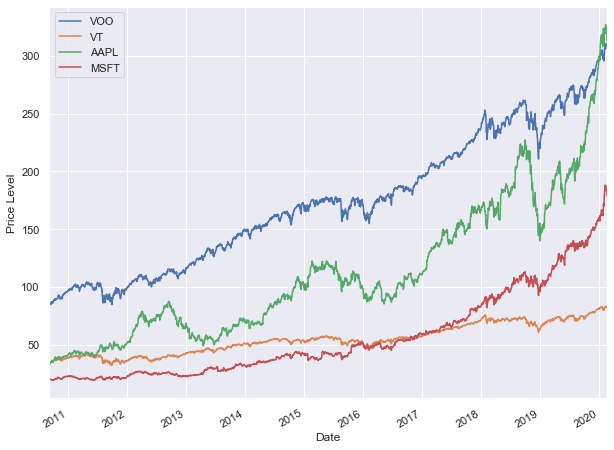

In [4]:
data.plot(figsize=(10,8))
plt.ylabel('Price Level')

**1.2.** Create the following variables:
- a dataframe `log_rets` that stores the log-returns $R^i_t$, according to $R^i_t = \log(P^i_t/P^i_{t-1})$, where $P^i_t$ stands for the price level of asset $i$ in period $t$ (available in the `VOO.csv`) file; drop the missing values on this dataframe using the method `dropna`;
- a dataframe `train_set` that stores the log-return data up to, and including, the year 2018.

In [5]:
log_rets = np.log(data/data.shift(1))

log_rets.dropna(inplace=True)

train_set = log_rets[:"2018"]

In [6]:
train_set.tail()

,VOO,VT,AAPL,MSFT
Date,,,,
2018-12-24,-0.027923,-0.018928,-0.026215,-0.042635
2018-12-26,0.049350,0.036545,0.068052,0.066078
2018-12-27,0.009251,0.005553,-0.006511,0.006147
2018-12-28,-0.001272,0.001076,0.000512,-0.007839
2018-12-31,0.008960,0.005822,0.009619,0.011686


Compute descriptive statistics of the training set data contained in `train_set`: number of observations per asset, mean, standard variation, minimum and maximum values.

In [7]:
train_set.describe()  # simpler version: using pandas `describe` method

,VOO,VT,AAPL,MSFT
count,2091.000000,2091.000000,2091.000000,2091.000000
mean,0.000474,0.000301,0.000745,0.000790
std,0.009104,0.009868,0.015991,0.014493
min,-0.066277,-0.076535,-0.131885,-0.121033
25%,-0.003168,-0.003819,-0.006889,-0.006558
50%,0.000609,0.000676,0.000666,0.000390
75%,0.005045,0.005452,0.009384,0.008118
max,0.049350,0.054773,0.085022,0.099413


In [8]:
# alternative version: print a table as we did in class
ticker = list(train_set.columns.values)

for tic in ticker:
    print(f'{tic}') 
    print(32 * '-')
    dstat = sps.describe(train_set[tic])  # use scipy.stats `describe`
    print('%15s %15s' % ('statistic', 'value'))
    print(32 * '-')
    print('%15s %15.4f' % ('number of obs.', dstat[0]))
    print('%15s %15.4f' % ('min', dstat[1][0]))
    print('%15s %15.4f' % ('max', dstat[1][1]))
    print('%15s %15.4f' % ('mean', dstat[2]))
    print('%15s %15.4f' % ('std', np.sqrt(dstat[3])))

VOO
--------------------------------
      statistic           value
--------------------------------
 number of obs.       2091.0000
            min         -0.0663
            max          0.0494
           mean          0.0005
            std          0.0091
VT
--------------------------------
      statistic           value
--------------------------------
 number of obs.       2091.0000
            min         -0.0765
            max          0.0548
           mean          0.0003
            std          0.0099
AAPL
--------------------------------
      statistic           value
--------------------------------
 number of obs.       2091.0000
            min         -0.1319
            max          0.0850
           mean          0.0007
            std          0.0160
MSFT
--------------------------------
      statistic           value
--------------------------------
 number of obs.       2091.0000
            min         -0.1210
            max          0.0994
           mean

**1.3.** In what follows, assume that the investor is not allowed to take negative (i.e. short) positions in any of the assets. Only long positions are allowed, and the combined positions (the portfolio weights) on the four assets must sum to 100%. Furthermore, assume that the risk-free rate is zero.

Randomly generate 2500 arrays with 4 elements, each representing the portfolio weight of each of the assets in `log_rets`. These portfolio weights should respect the restrictions outlined above (must sum to 1 and cannot be negative).

For all the portfolios created, calculate the corresponding average *annualized return* and *annualized volatility* (measured by the standard deviation of the return) using the `train_set` return data. Store these values in two lists, `prets` (average return) and `pvols` (volatility).

Finally, produce a scatter plot with the [Sharpe ratio](http://web.stanford.edu/~wfsharpe/art/sr/SR.htm) (SR) of each portfolio in the simulation (i.e. the ratio of `prets` and `pvols`), with average volatility on the horizontal axis and average returns on the vertical. Use different colors to distinguish between points with high and low SR values (a color map), and add the corresponding color legend.

In [9]:
# A function that returns the annualized return of a porftolio
def port_ret(weights, portfolio):
    return np.sum(portfolio.mean()*weights) * 252

# A function that returns the annualized volatility of a porftolio:
# w'*Sigma*w, where Sigma is the covariance matrix of returns.
def port_vol(weights, portfolio):
    return np.sqrt(np.dot(weights.T, np.dot(portfolio.cov() * 252, weights)))

In [10]:
prets = []
pvols = []

# Randomly generate 2500 portfolio weights and compute returns and volatility
for p in range (2500):  
    weights = np.random.random_sample(4)  # array with 4 random numbers in the [0, 1] interval
    weights /= np.sum(weights)  # normalize them to make sure they sum to 1
    prets.append(port_ret(weights, train_set))  
    pvols.append(port_vol(weights, train_set))

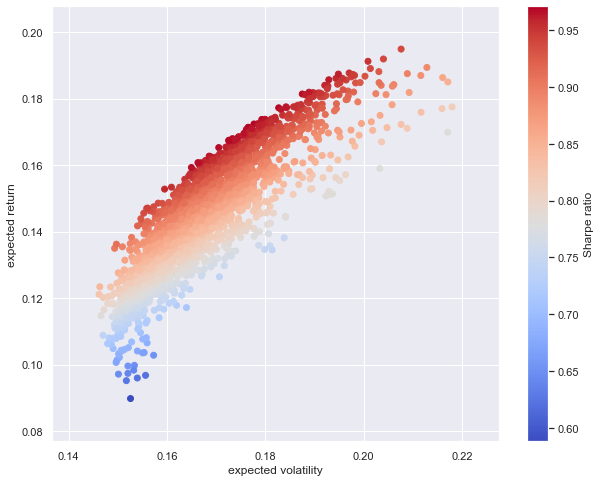

In [11]:
plt.figure(figsize=(10, 8))

# plot the ratio of returns to volatility, i.e. the Sharpe Ratio, using a color map.
plt.scatter(pvols, prets, c=np.divide(prets,pvols), marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

**1.4.** Calculate the portfolio with the highest (ex-post) Sharpe Ratio using the `train_set` data. Store this portfolio in a `list` named `opt_sr`. You can use optimization routines available in Python, such as in the `scipy.optimize` module.

Add a point corresponding to `opt_sr` to the figure created above, using a [marker](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) that allows to distringuish it from the rest.

In [12]:
import scipy.optimize as scpo

noa = 4 # number of different assets

# define the objective function: we will minimize the negative of the Sharpe Ratio
def min_func_sharpe(weights, portfolio):  
    return -port_ret(weights, portfolio)/port_vol(weights, portfolio)

# constraint: weights must sum to one
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1})

# bounds: weights must be in the [0, 1] interval
bnds = tuple((0, 1) for x in range(noa))

# initial guess: equal weights (1/4)
eweights = np.array(noa*[1./noa,])

# for details about `scpo.minimize` uncomment cell below
opts = scpo.minimize(min_func_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons, args=train_set)

opt_sr = opts['x']  # store the solution

In [13]:
#scpo.minimize?

**1.5.** Calculate the portfolio with the lowest volatility using the `train_set` data. Store this portfolio in a `list` named `opt_vol`. You can again use optimization routines available in Python, such as in the `scipy.optimize` module.

Add a point corresponding to `opt_vol` to the figure created above, using a [marker](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) that allows to distringuish it from the rest.

In [14]:
# find portfolio that minimizes volatility
optv = scpo.minimize(port_vol, eweights, method='SLSQP', bounds=bnds, constraints=cons, args=train_set)

opt_vol = optv['x']  # store the solution

**1.6.** Draw the efficient frontier. To do so, generate a list `efrets` with 50 points equally spaced between the average return value of the *lowest volatility* portfolio (found in 1.5.), and the average return of the *highest Sharpe Ratio* portfolio (found in 1.4.). 

For each of the return levels in `efrets`, find the portfolio that minimizes volatility, and store the corresponding volatility value in a list `efvol`.

Add a *line* with the Sharpe Ratio of the 50 portfolios in the scatter plot generated in 1.3.

If you cannot solve 1.5. and 1.6., use instead 0.12 and and **0.18** as bounds of the interval of 50 return values to consider in this exercise.

In [15]:
# two constraints: for given portfolio `x`, 
# i) return of `x`, given by `port_ret`, must be equal to `tret`;
# ii) weights `x` must sum to 1
cons = ({'type': 'eq', 'fun': lambda x:  port_ret(x, train_set) - tret},
                 {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

# bounds: weights must be in the [0, 1] interval
bnds = tuple((0, 1) for x in weights)

In [16]:
# create array of 50 points for the desired returns, between the lowest volatility
# and the highest Sharpe ratio returns
trets = np.linspace(port_ret(opt_vol, train_set), port_ret(opt_sr, train_set), 50)

tvols = []
for tret in trets:
    # finds the porftolio weights that minimize volatility, given return level `tret`
    res = scpo.minimize(port_vol, eweights, method='SLSQP',bounds=bnds, constraints=cons, args=train_set)  
    tvols.append(res['fun'])
    
tvols = np.array(tvols)

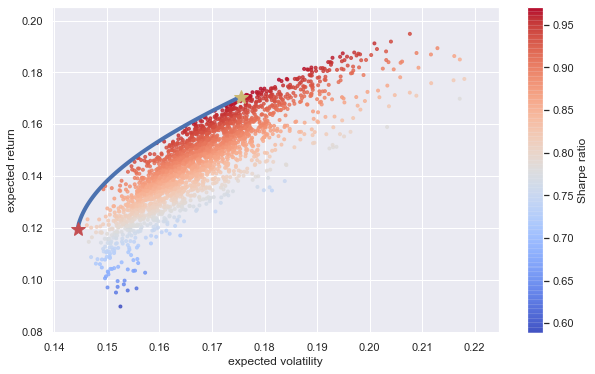

In [17]:
plt.figure(figsize=(10, 6))

plt.scatter(pvols, prets, c=np.divide(prets,pvols), marker='.',
            alpha=0.8, cmap='coolwarm')

# plot a line with the solution above
plt.plot(tvols, trets, 'b', lw=4.0)

plt.plot(port_vol(opt_sr, train_set), port_ret(opt_sr, train_set),
        'y*', markersize=15.0)

plt.plot(port_vol(opt_vol, train_set), port_ret(opt_vol, train_set), 'r*', 
         markersize=15.0)

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

**1.7.** Finally, using the highest Sharpe Ratio portfolio found in 1.4., calculate the cummulated log returns over time during 2018 and during 2019, at a daily frequency. 

Create a figure with two plots (2018 on the left, 2019 on the right hand side), displaying the cummulated portfolio returns. Add text on each plot displaying the cummulated log return value at the end of each year.

If you cannot solve 1.4. you can use an equally weighted portfolio.

In [18]:
# calculate portfolio return in 2018 and 2019
tset2018 = (log_rets['2018']*opt_sr).sum(axis=1)
tset2019 = (log_rets['2019']*opt_sr).sum(axis=1)

In [19]:
# calculate cummulated returns, converting back to levels with exponential
cumret2018 = (np.exp(tset2018.cumsum())-1)*100  # if you want the % net return
cumret2019 = (np.exp(tset2019.cumsum())-1)*100

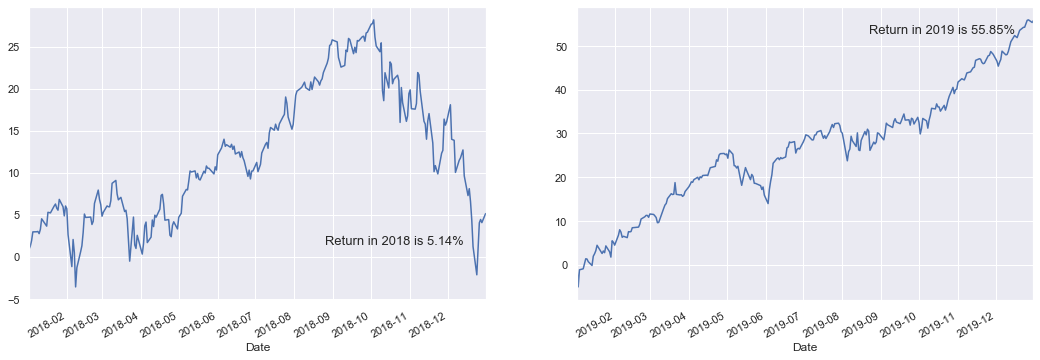

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

cumret2018.plot(ax=axes[0])

cumret2019.plot(ax=axes[1])

# position text
plt.text(0.8, 0.2, 'Return in 2018 is '+ str((round((cumret2018[-1]), 2))) +"%", fontsize=13,
         horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
plt.text(0.8, 0.92, 'Return in 2019 is '+ str((round((cumret2019[-1]), 2))) +"%", fontsize=13,
         horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
plt.show()
